In [8]:
import pandas as pd

# =========================================================
# 1. CARGA DE DATOS
# =========================================================
# Formato esperado:
# vehicle | arrival (datetime) | departure (datetime)

data = [
    ("V1", "2025-12-08 22:30", "2025-12-09 06:30"),
    ("V2", "2025-12-08 23:00", "2025-12-09 07:00"),
    ("V3", "2025-12-09 05:00", "2025-12-09 18:00"),
    ("V4", "2025-12-09 12:00", "2025-12-10 06:00"),
    ("V5", "2025-12-09 20:00", "2025-12-10 08:00"),
]

df = pd.DataFrame(data, columns=["vehicle", "arrival", "departure"])
df["arrival"] = pd.to_datetime(df["arrival"])
df["departure"] = pd.to_datetime(df["departure"])

# Ordenar por llegada (solo estética)
df = df.sort_values("arrival").reset_index(drop=True)

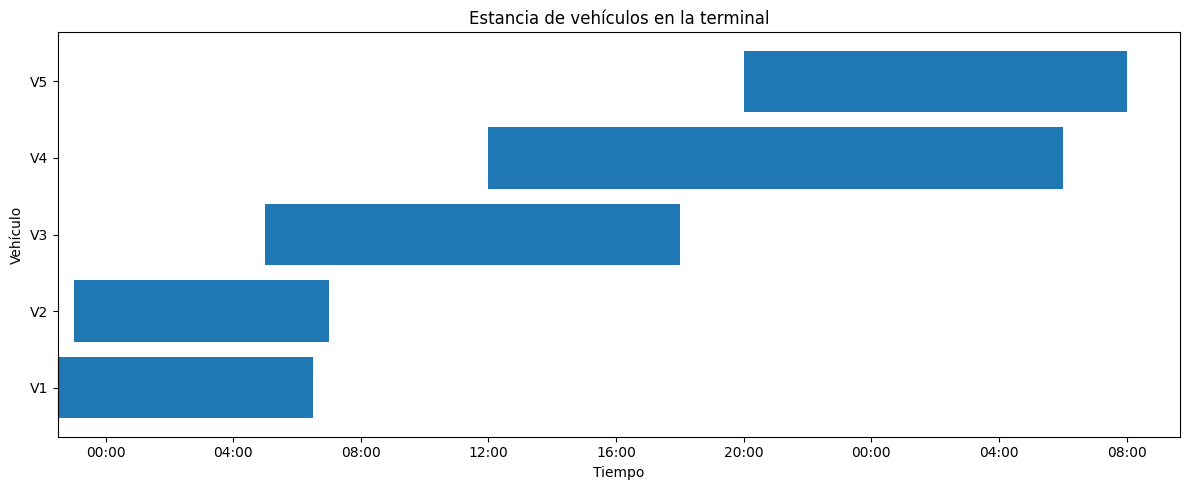

In [10]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# =========================================================
# 2. DIAGRAMA DE GANTT (ESTANCIA EN TERMINAL)
# =========================================================
plt.figure(figsize=(12, 5))

plt.barh(
    df["vehicle"],
    df["departure"] - df["arrival"],
    left=df["arrival"]
)

plt.xlabel("Tiempo")
plt.ylabel("Vehículo")
plt.title("Estancia de vehículos en la terminal")

plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
plt.tight_layout()
plt.show()

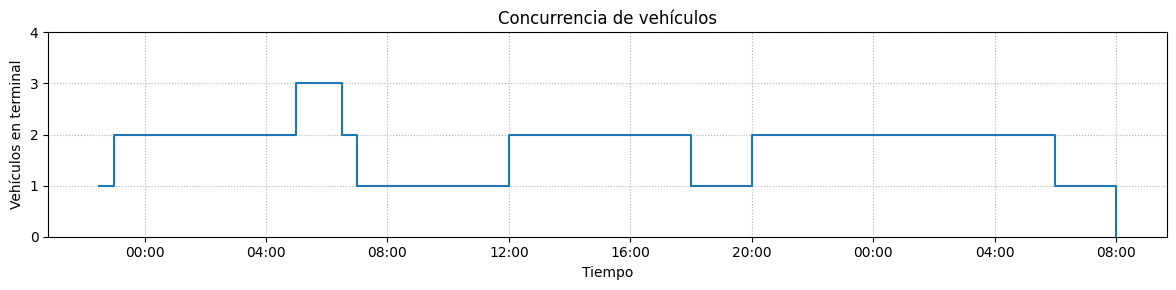

👉 Mínimo de cargadores necesarios (suposición trivial): 3


In [12]:
# =========================================================
# 3. CONCURRENCIA (VEHÍCULOS SIMULTÁNEOS)
# =========================================================
events = []

for _, row in df.iterrows():
    events.append((row["arrival"], +1))
    events.append((row["departure"], -1))

# Orden: primero llegadas, luego salidas si coinciden
events.sort(key=lambda x: (x[0], -x[1]))

times = []
counts = []

current = 0
for t, delta in events:
    current += delta
    times.append(t)
    counts.append(current)

plt.figure(figsize=(12, 3))
plt.step(times, counts, where="post")
plt.xlabel("Tiempo")
plt.ylabel("Vehículos en terminal")
plt.title("Concurrencia de vehículos")

plt.gca().xaxis.set_major_formatter(DateFormatter("%H:%M"))
plt.ylim(0, max(counts) + 1)
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()

print(f"👉 Mínimo de cargadores necesarios (suposición trivial): {max(counts)}")